# Turbofan Engine - Data set: FD001
## Data Pre-processing

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
from pykalman import KalmanFilter
import random

import myFunctions as f

In [2]:
train, test, RUL = f.import_("train_FD001.txt", "test_FD001.txt", "RUL_FD001.txt")

### 1. Column selection
Remove operational setting columns and non informative sensor data (visual analysis from data exploratory notebook)

In [3]:
col_drop = ["op_setting_1", "op_setting_2","op_setting_3", 
        "sm_1", "sm_5", "sm_6", "sm_10", "sm_16", "sm_18", "sm_19"]

In [4]:
train = train.drop(columns = col_drop)
print(train.shape)
train.head()

(20631, 16)


,unit_number,n_cycles,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [5]:
test = test.drop(columns = col_drop)
print(test.shape)
test.head()

(13096, 16)


,unit_number,n_cycles,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


### 2. Filter sensor data (optional)
#### 2.1 Median filter 

In [6]:
units = train["unit_number"].unique()
sensors = train.columns[2::]

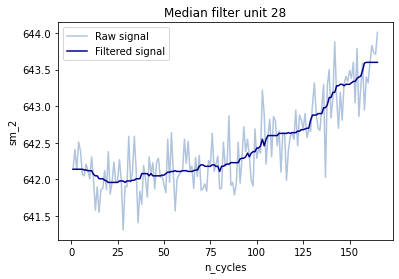

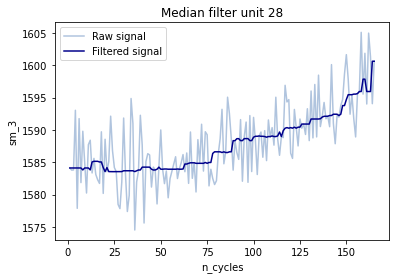

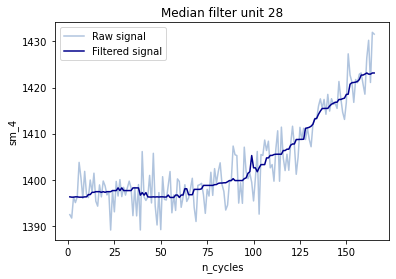

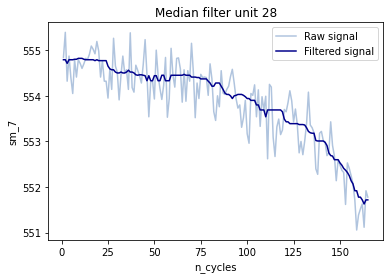

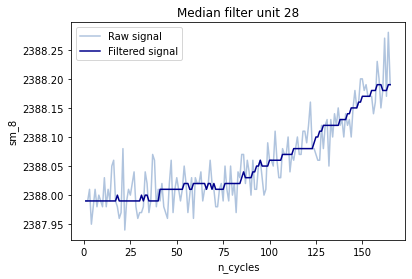

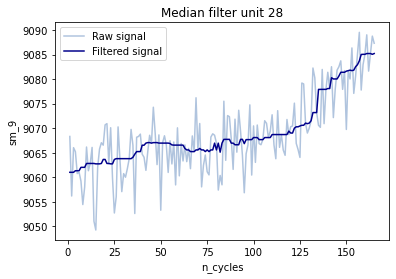

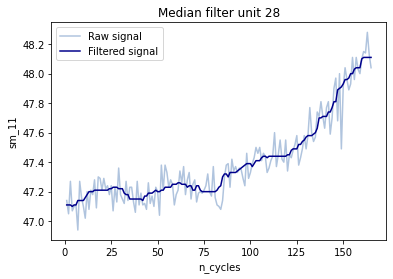

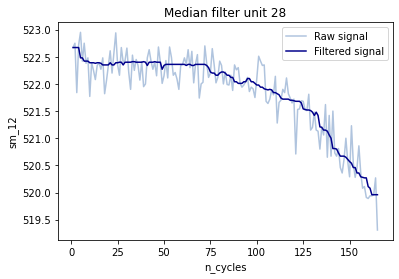

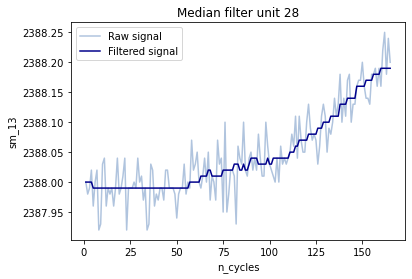

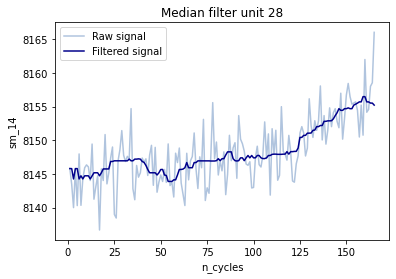

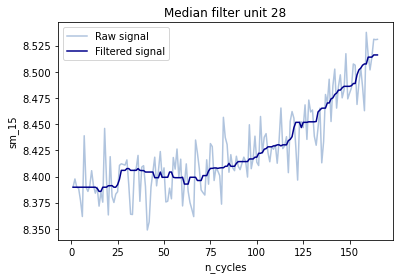

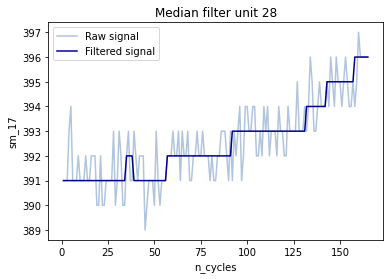

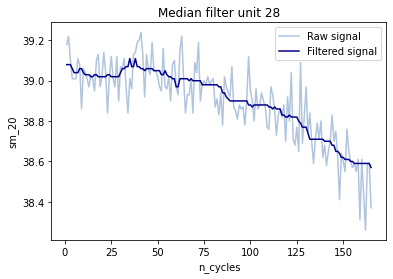

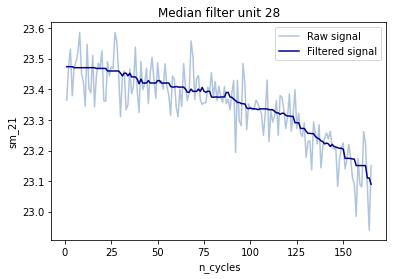

In [26]:
unit = random.choice(units)
for sm in sensors:
    x = train[train["unit_number"]==unit]["n_cycles"].values
    y = train[train["unit_number"]==unit][sm].values
    y_filter = ndimage.median_filter(y, size = 20)
        
    plt.plot(x, y, color="lightsteelblue")
    plt.plot(x, y_filter, color="darkblue")
    plt.legend(['Raw signal', "Filtered signal"])
        
    plt.title("Median filter unit "+str(unit))
    plt.xlabel("n_cycles")
    plt.ylabel(sm)
    
    plt.show()

In [27]:
def apply_median_filter(S):
    # new names for columns to avoid confusion
    filter_cols = []
    for col in S.columns:
        if col[0] == "s":
            new_name = col+str("F")
        else:
            new_name = col
        filter_cols.append(new_name)
        
    # create empy dataframe and add the 2 firsts columns
    SF = pd.DataFrame(columns = filter_cols)
    SF["unit_number"] = S["unit_number"]
    SF["n_cycles"] = S["n_cycles"]
    
    # filter all sensor data, by unit and append it to new df
    sensors = S.columns[2::]
    units = S["unit_number"].unique()
    for sm in sensors:
        colF = []
        for unit in units:
            y = S[S["unit_number"]==unit][sm].values
            y_filter = ndimage.median_filter(y, size = 20)
            colF.append(y_filter)
        colF = np.concatenate(colF)
        SF[sm+str("F")] = colF
    return SF

In [9]:
trainF = apply_median_filter(train)
trainF.head()

,unit_number,n_cycles,sm_2F,sm_3F,sm_4F,sm_7F,sm_8F,sm_9F,sm_11F,sm_12F,sm_13F,sm_14F,sm_15F,sm_17F,sm_20F,sm_21F
0,1,1,642.35,1589.70,1400.97,554.26,2388.05,9049.68,47.28,522.28,2388.04,8132.85,8.4178,392,38.98,23.4044
1,1,2,642.35,1587.99,1400.97,554.26,2388.05,9049.61,47.28,522.28,2388.03,8132.85,8.4178,392,38.98,23.4044
2,1,3,642.35,1587.99,1400.97,554.34,2388.05,9049.61,47.27,522.28,2388.03,8133.23,8.4178,392,38.98,23.3774
3,1,4,642.35,1587.99,1400.83,554.34,2388.06,9049.61,47.28,522.19,2388.03,8133.23,8.4178,392,38.98,23.3774
4,1,5,642.35,1587.99,1400.83,554.34,2388.06,9049.48,47.28,522.19,2388.03,8133.23,8.4178,392,38.98,23.3826


#### 2.2 Kalman filter

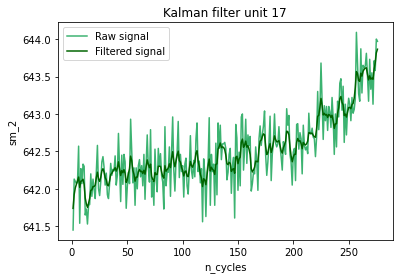

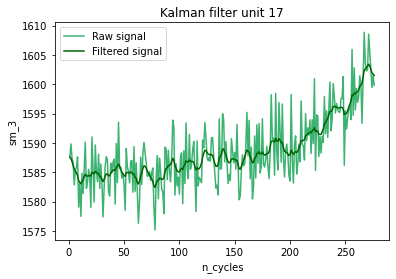

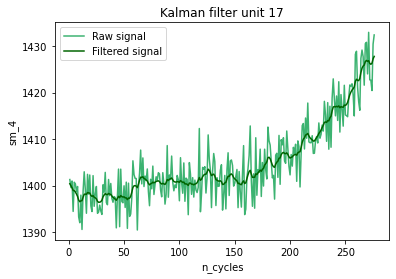

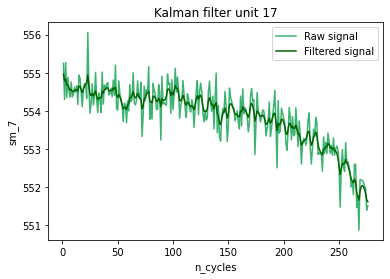

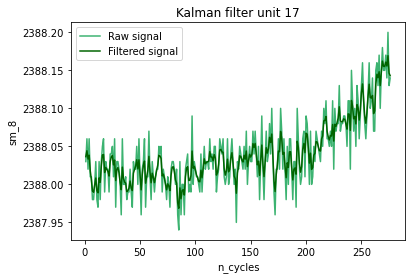

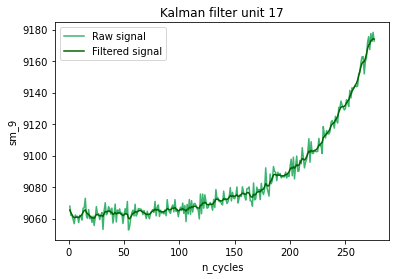

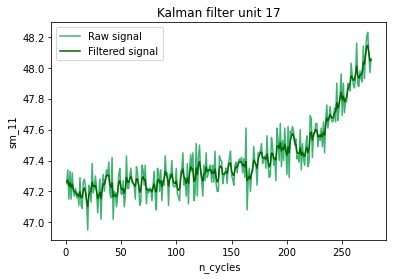

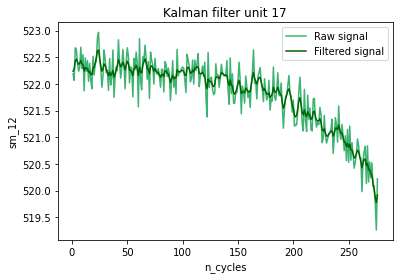

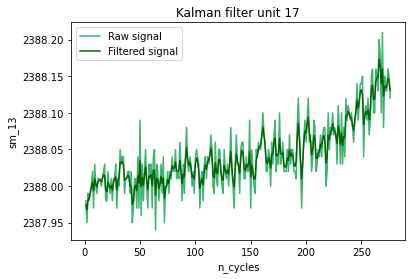

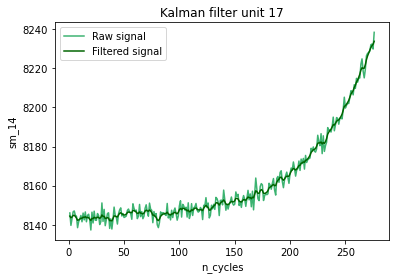

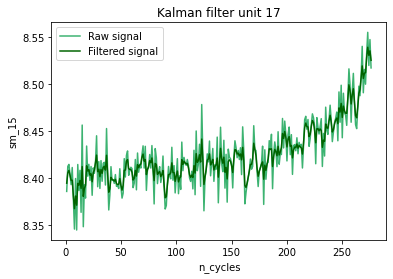

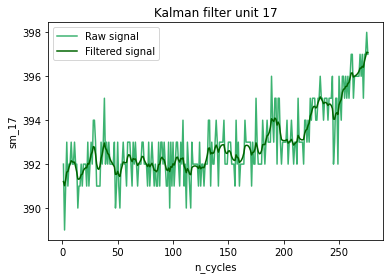

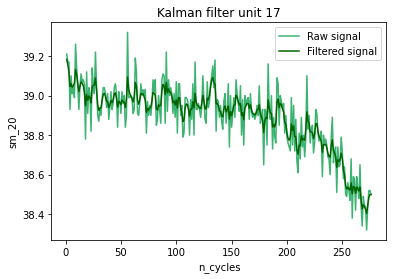

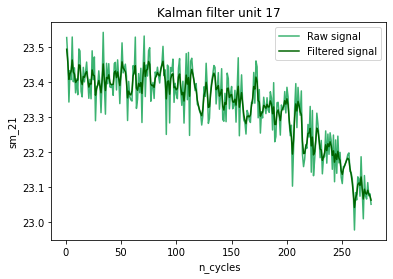

In [25]:
for sm in sensors:
    x = train[train["unit_number"]==unit]["n_cycles"].values
    y = train[train["unit_number"]==unit][sm].values
    kf = KalmanFilter(initial_state_mean=y[0], n_dim_obs=1)
    y_filter =  kf.em(y, n_iter=10).smooth(y)[0].flatten()
        
    plt.plot(x, y, color = "mediumseagreen")
    plt.plot(x, y_filter, color = "darkgreen")
    plt.legend(['Raw signal', "Filtered signal"])
        
    plt.title("Kalman filter unit "+str(unit))
    plt.xlabel("n_cycles")
    plt.ylabel(sm)
    
    plt.show()

In [28]:
def apply_kalman_filter(S):
    # new names for columns to avoid confusion
    filter_cols = []
    for col in S.columns:
        if col[0] == "s":
            new_name = col+str("F")
        else:
            new_name = col
        filter_cols.append(new_name)
        
    # create empy dataframe and add the 2 firsts columns
    SF = pd.DataFrame(columns = filter_cols)
    SF["unit_number"] = S["unit_number"]
    SF["n_cycles"] = S["n_cycles"]
    
    # filter all sensor data, by unit and append it to new df
    sensors = S.columns[2::]
    units = S["unit_number"].unique()
    for sm in sensors:
        colF = []
        for unit in units:
            y = S[S["unit_number"]==unit][sm].values
            kf = KalmanFilter(initial_state_mean=y[0], n_dim_obs=1)
            y_filter = kf.em(y, n_iter=10).smooth(y)[0].flatten()
            colF.append(y_filter)
        colF = np.concatenate(colF)
        SF[sm+str("F")] = colF
    return SF

In [29]:
trainF = apply_kalman_filter(train)
trainF.head()

,unit_number,n_cycles,sm_2F,sm_3F,sm_4F,sm_7F,sm_8F,sm_9F,sm_11F,sm_12F,sm_13F,sm_14F,sm_15F,sm_17F,sm_20F,sm_21F
0,1,1,641.999170,1589.233653,1401.580444,554.199971,2388.058208,9047.069730,47.438982,521.956713,2388.033907,8135.762318,8.420834,391.757763,39.026985,23.412097
1,1,2,642.119661,1588.750087,1401.842750,554.115882,2388.056224,9047.739785,47.404919,522.157818,2388.051008,8134.792329,8.422485,391.691409,38.994898,23.403833
2,1,3,642.226233,1587.897431,1401.936773,554.199977,2388.073179,9048.860588,47.307045,522.298762,2388.045305,8134.241914,8.412355,391.569245,38.958787,23.374996
3,1,4,642.276016,1587.033645,1401.737205,554.256481,2388.082171,9049.480330,47.236954,522.380009,2388.057979,8133.820068,8.395340,391.730883,38.929605,23.378212
4,1,5,642.291853,1586.680065,1401.520411,554.224031,2388.058676,9050.100112,47.247079,522.224913,2388.044212,8133.396960,8.412647,391.843850,38.939537,23.385915
